In [5]:
import pymysql 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

## Ejercicio 1
Connecta Python amb MySQL Workbench i carrega les dades de la teva base de dades del Sprint 4 per utilitzar-les en tots els exercicis.

### 1.1 Connecta Python amb MySQL Workbench i carrega les dades de la teva base de dades del Sprint 4 per utilitzar-les en tots els exercicis.


In [7]:
conexion = pymysql.connect(host="localhost", user = "root", password= "1234", db = "american")
#miConexion.close()


In [8]:
# leer los datos de los datos
tablas = pd.read_sql("SHOW TABLES;", conexion)
#consulta = "select* from transaction"
#df = pd.read_sql(tablas, conexion)
tablas

C:\Users\Sergi\AppData\Local\Temp\ipykernel_3432\4259284207.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tablas = pd.read_sql("SHOW TABLES;", conexion)


,Tables_in_american
0,american_european_users
1,card_status
2,companies
3,credit_card
4,products
5,transaction
6,transaction_products


In [9]:
dfs = {}

for tabla in tablas.iloc[:,0]:   # nombre de la columna que contiene los nombres
    dataf = pd.read_sql(f"SELECT * FROM {tabla};", conexion)
    dfs[tabla] = dataf
    print(f"Tabla: '{tabla}' cargada con {dataf.shape[0]} filas y {dataf.shape[1]} columnas.")



C:\Users\Sergi\AppData\Local\Temp\ipykernel_3432\2038547090.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataf = pd.read_sql(f"SELECT * FROM {tabla};", conexion)


Tabla: 'american_european_users' cargada con 5000 filas y 10 columnas.
Tabla: 'card_status' cargada con 5000 filas y 2 columnas.
Tabla: 'companies' cargada con 100 filas y 6 columnas.
Tabla: 'credit_card' cargada con 5000 filas y 9 columnas.
Tabla: 'products' cargada con 100 filas y 6 columnas.
Tabla: 'transaction' cargada con 100000 filas y 10 columnas.
Tabla: 'transaction_products' cargada con 253391 filas y 2 columnas.


In [6]:
dfs.keys()

dict_keys(['american_european_users', 'card_status', 'companies', 'credit_card', 'products', 'transaction', 'transaction_products'])

In [10]:
df_users = dfs['american_european_users']
df_card_status = dfs['card_status']
df_companies = dfs['companies']
df_credit_card = dfs['credit_card']
df_products = dfs['products']
df_transaction = dfs['transaction']
df_transaction_products = dfs['transaction_products']

### 1. 2 Per a cada ítem, crea una visualització adequada segons les variables especificades. Interpreta els resultats segons les teves dades.

Recorda: quan seleccionis les columnes, pensa sempre en el mètode que faràs servir i
inclou les que calguin per a la funció de visualització que vulguis utilitzar.

#### 1.2.1 Una variable numèrica

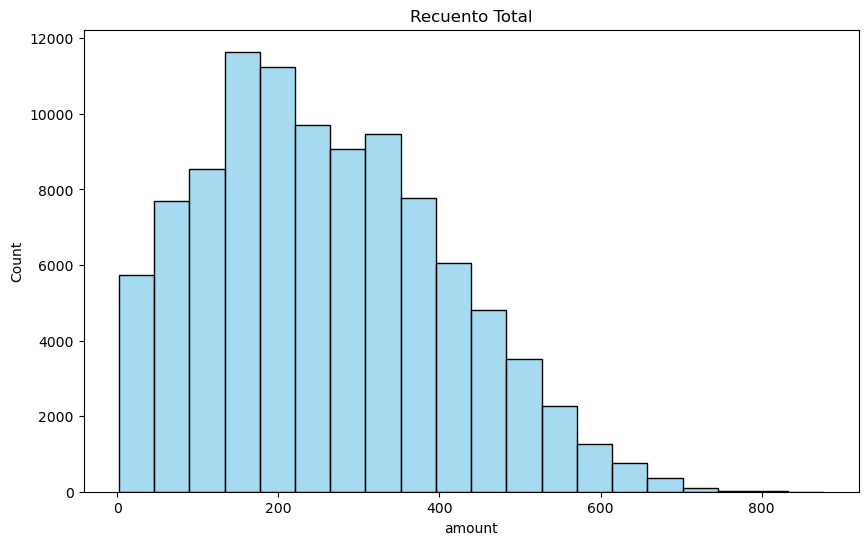

In [11]:
#histograma
plt.figure(figsize=(10,6))
sns.histplot(df_transaction['amount'], bins=20, kde=False, color='skyblue')
plt.title('Recuento Total')
#plt.xlabel('Total')
#plt.ylabel('Recuento')
plt.show()

#### 1.2.2 Dues variables numèriques.

In [8]:
#df_transaction.select_dtypes(include=['number']).columns

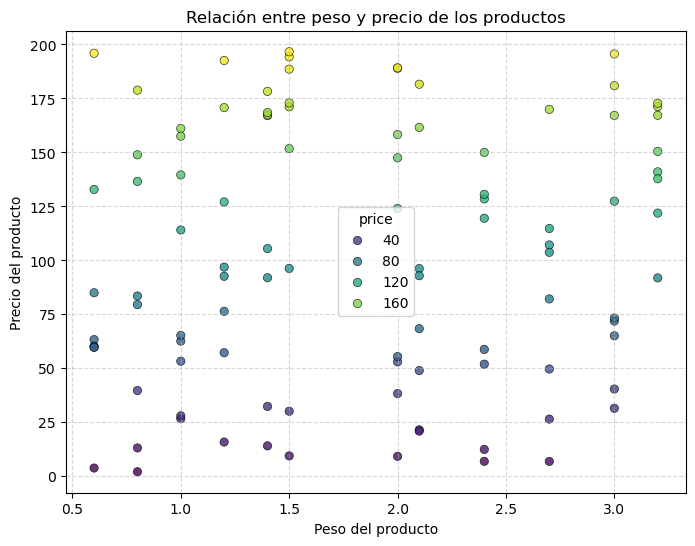

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_products,
    x='weight',
    y='price',
    hue='price',           # color por precio (para ver tendencia visual)
    palette='viridis',
    alpha=0.8,
    edgecolor='k'
)

plt.title('Relación entre peso y precio de los productos')
plt.xlabel('Peso del producto')
plt.ylabel('Precio del producto')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


#### 1.2.3 Una variable categòrica.

C:\Users\Sergi\AppData\Local\Temp\ipykernel_16860\1840932880.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


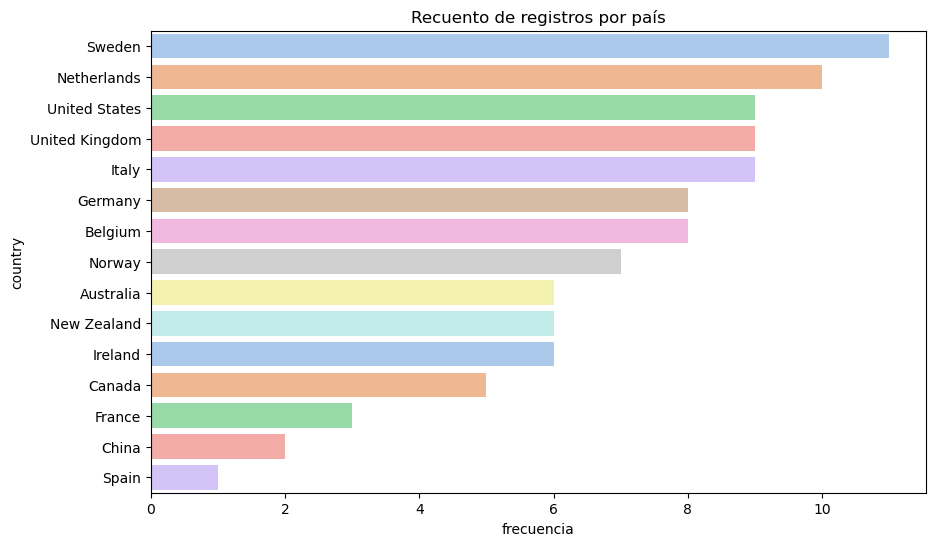

In [11]:
recuento_country = df_companies['country'].value_counts().reset_index()
recuento_country.columns = ['country', 'frecuencia']

plt.figure(figsize=(10,6))
sns.barplot(
    x='frecuencia',
    y= 'country',
    data=recuento_country,
    palette='pastel'
)
plt.title('Recuento de registros por país')
#plt.xlabel('Número de registros')
#plt.ylabel('País')
plt.show()

#### 1.2.4 Una variable categòrica i una numèrica.

In [ ]:
df_companies.head(3)

C:\Users\Sergi\AppData\Local\Temp\ipykernel_16860\631739707.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


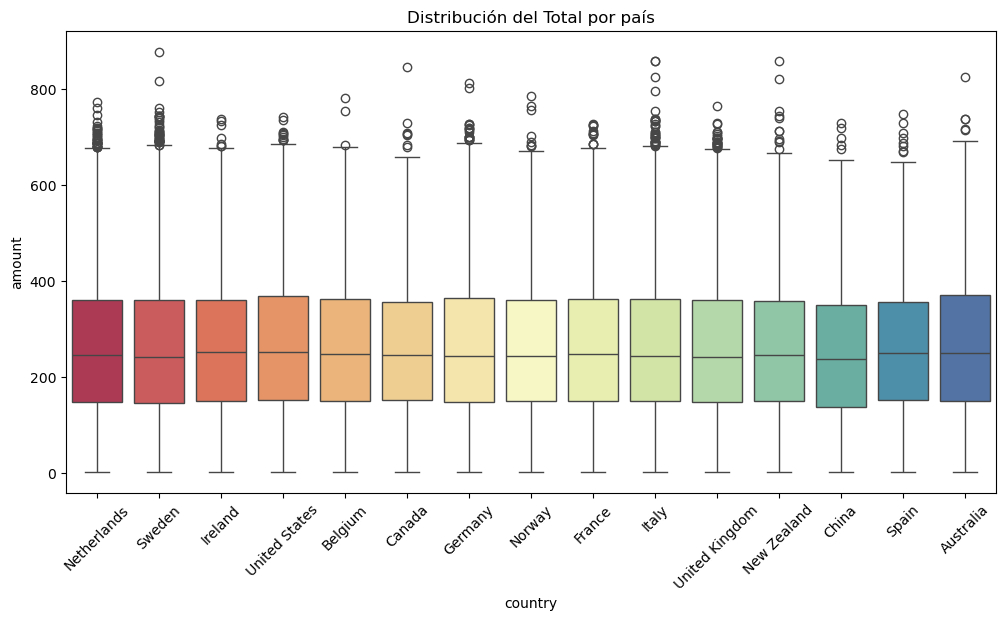

In [12]:
df_merge = pd.merge(
    df_transaction[['business_id', 'amount']],
    df_companies[['company_id', 'country']],
    left_on='business_id',
    right_on='company_id',
    how='left'
)

#df_merge.head()

plt.figure(figsize=(12,6))
sns.boxplot(
    x='country',
    y='amount',
    data=df_merge,
    palette='Spectral'
)
plt.title('Distribución del Total por país')
#plt.xlabel('Country')
#plt.ylabel('Amount')
plt.xticks(rotation=45)  
plt.show()

C:\Users\Sergi\AppData\Local\Temp\ipykernel_16860\462701818.py:3: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.scatter_geo(


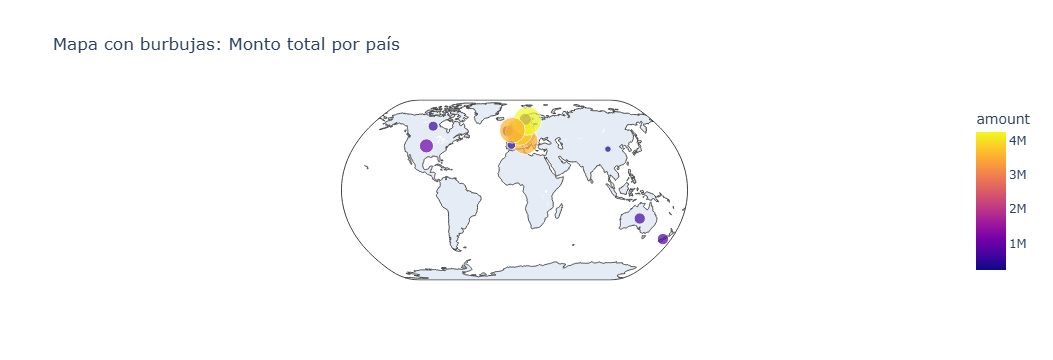

In [13]:
df_map = df_merge.groupby('country')['amount'].sum().reset_index()

fig = px.scatter_geo(
    df_map,
    locations="country",
    locationmode="country names",
    size="amount",        
    color="amount",       
    hover_name="country", 
    projection="natural earth",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Mapa con burbujas: Monto total por país"
)

fig.show()

#### 1.2.5 Dues variables categòriques.

In [14]:
df_user_tr = pd.merge(
    df_transaction[['user_id', 'business_id']],
    df_users[['id', 'country']],
    left_on='user_id',
    right_on='id',
    how='left'
).rename(columns={'country': 'user_country'})

df_user_company = pd.merge(
    df_user_tr,
    df_companies[['company_id', 'country']],
    left_on='business_id',
    right_on='company_id',
    how='left'
).rename(columns={'country': 'company_country'})

tabla_crosstab = pd.crosstab(
    index=df_user_company['user_country'],
    columns=df_user_company['company_country'],
    margins=True,        
    #normalize=True      
)

tabla_crosstab


company_country,Australia,Belgium,Canada,China,France,Germany,Ireland,Italy,Netherlands,New Zealand,Norway,Spain,Sweden,United Kingdom,United States,All
user_country,,,,,,,,,,,,,,,,
Canada,1165,1649,970,422,0,0,1244,0,0,1217,1414,0,0,0,1905,9986
France,0,0,0,0,534,1419,0,1452,1662,0,0,167,1788,1484,0,8506
Germany,0,0,0,0,502,1478,0,1531,1678,0,0,176,1812,1546,0,8723
Italy,0,0,0,0,478,1448,0,1465,1623,0,0,189,1841,1522,0,8566
Netherlands,0,0,0,0,560,1444,0,1602,1731,0,0,177,1848,1599,0,8961
Poland,0,0,0,0,517,1433,0,1434,1537,0,0,162,1725,1466,0,8274
Portugal,0,0,0,0,520,1540,0,1478,1760,0,0,151,1812,1504,0,8765
Spain,0,0,0,0,552,1459,0,1546,1737,0,0,156,1940,1570,0,8960
Sweden,0,0,0,0,473,1370,0,1389,1571,0,0,167,1729,1417,0,8116


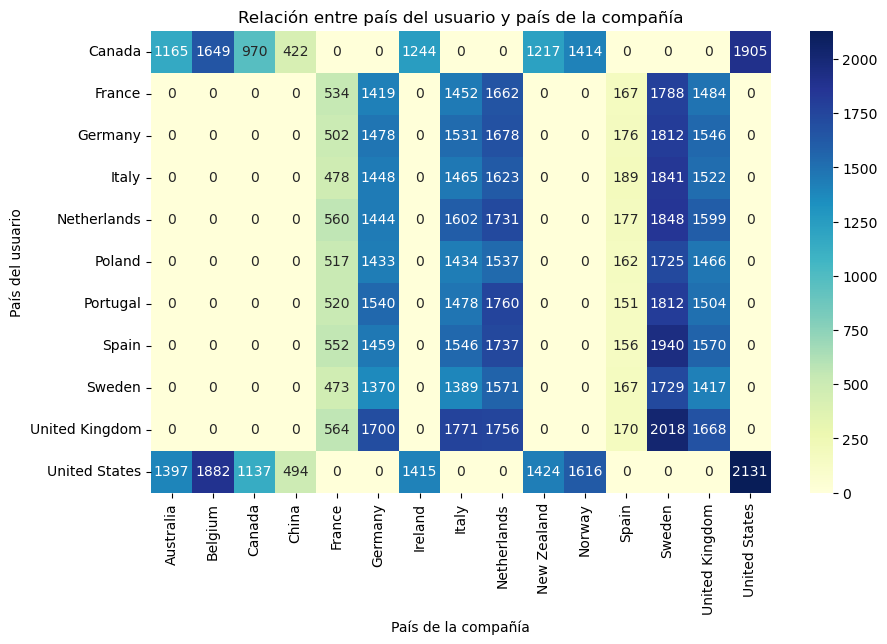

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(tabla_crosstab.iloc[:-1, :-1], annot=True, fmt="d", cmap="YlGnBu") #vmin=-1, vmax=1,
plt.title("Relación entre país del usuario y país de la compañía")
plt.xlabel("País de la compañía")
plt.ylabel("País del usuario")
plt.show()


#### 1.2.6 Tres variables combinades.

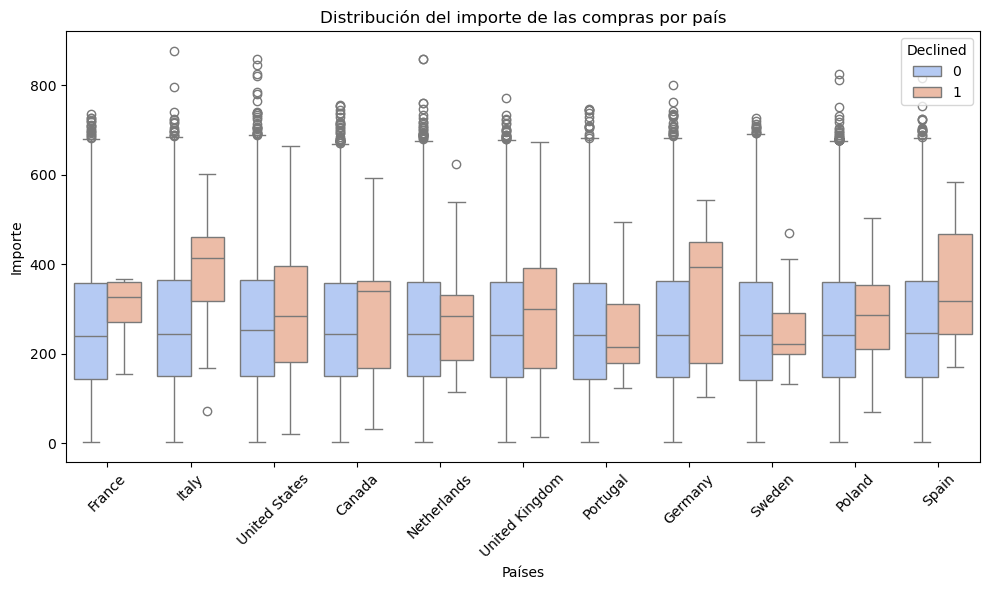

In [16]:
df_merge = pd.merge(
    df_transaction[['user_id', 'amount', 'declined']],
    df_users[['id', 'country']],
    left_on='user_id',
    right_on='id',
    how='left'
)
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_merge,
    x="country",
    y="amount",
    hue="declined",
    palette="coolwarm"
)

plt.legend(title="Declined", loc='upper right')
plt.xlabel("Países")
plt.ylabel("Importe")
plt.title("Distribución del importe de las compras por país")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.7 Crea un Pairplot.

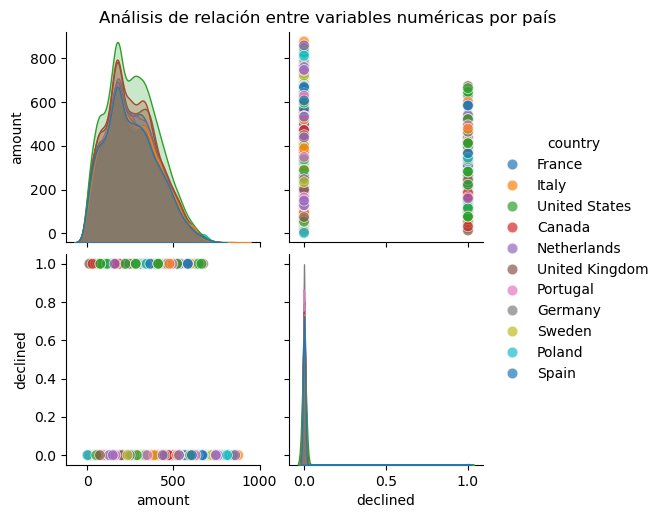

In [17]:
df_merge_tr_u = pd.merge(
    df_transaction[['user_id', 'amount', 'declined']],
    df_users[['id', 'country']],
    left_on='user_id',
    right_on='id',
    how='left'
)

# Eliminamos posibles nulos
df_merge_tr_u = df_merge.dropna(subset=['amount'])
variables = ['amount', 'declined']
sns.pairplot(
    df_merge,
    vars=variables,
    hue='country',         # color por país
    palette='tab10',
    diag_kind='kde',       # tipo de gráfico en la diagonal (kde o hist)
    plot_kws={'alpha':0.7, 's':60}  # transparencia y tamaño de puntos
)

plt.suptitle("Análisis de relación entre variables numéricas por país", y=1.02)
plt.show()

In [12]:

union_tabla = pd.merge(
    df_transaction_products[['transaction_id', 'product_id']],
    df_transaction[['id', 'amount']],
    left_on='transaction_id',
    right_on='id',
    how='left'
)

# Paso 2: unir con los datos de productos
union_tabla = pd.merge(
    union_tabla,
    df_products[['id', 'price', 'weight']],
    left_on='product_id',
    right_on='id',
    how='left'
)

# Paso 3: quedarnos solo con las columnas que queremos analizar
union_tabla = union_tabla[['amount', 'price', 'weight']]

# Revisamos las primeras filas
union_tabla.head()


,amount,price,weight
0,354.02,161.11,1.0
1,538.30,161.11,1.0
2,395.28,161.11,1.0
3,602.15,161.11,1.0
4,326.50,161.11,1.0


In [ ]:
""" plt.figure(figsize=(8,6))

pp = sns.pairplot(
    data=union_tabla,
    diag_kind='kde',          # tipo de gráfico en la diagonal (distribución)
    plot_kws={'alpha':0.6, 's':60, 'edgecolor':'k'}
)

pp.map_upper(sns.kdeplot, fill=True, cmap="Blues")

plt.suptitle('Relación entre variables numéricas: Amount, Price y Weight', y=1.02)
plt.subplots_adjust(top=0.93)
plt.show()"""



numeros = union_tabla[['amount', 'price', 'weight']]


pp = sns.pairplot(data=numeros)
pp.map_upper(sns.kdeplot, fill="True", cmap="Blues")

plt.suptitle('Relación entre valores numéricos')
plt.subplots_adjust(top=0.93)
plt.show()

## Nivell 2
2.1 Representa la correlació d'algunes variables i interpreta els resultats segons les teves dades.

In [1]:
print("Hola")

Hola


2.2 Implementa un Jointplot per explorar la relació entre dues variables i interpreta els resultats segons les teves dades.